Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_13 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 50)        14450     
                                                                 
 batch_normalization_14 (Bat  (None, 14, 14, 50)       200       
 chNormalization)                                                
                                                      

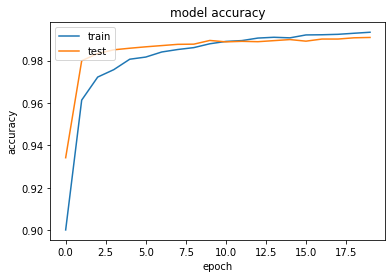

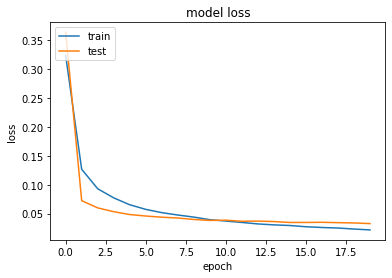

313/313 [==============================] - 1s 2ms/step


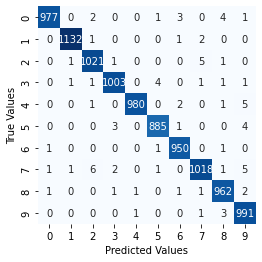

In [20]:
# -*- coding: utf-8 -*-

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix

mnist = datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

NB_CLASSES = 10  # number of outputs = number of digits
#one-hot
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

#build the model
model = models.Sequential()
# CONV => RELU => POOL
model.add(layers.Convolution2D(32, (3, 3), padding= 'same', 
           input_shape=(28, 28, 1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Convolution2D(50, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten
model.add(layers.Flatten()) 
#ajout de couche dense avec 800 neurones
model.add(layers.Dense(800, activation='relu'))
#dropout
model.add(layers.Dropout(0.5))
# softmax dense classifier
model.add(layers.Dense(NB_CLASSES, activation="softmax"))

# summary of the model
model.summary()
##################################################################
# compiling the model
model.compile(optimizer='SGD', loss='categorical_crossentropy',
              metrics=['accuracy'])
###############
#training the model
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT=0.2
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
		  verbose=VERBOSE, validation_split=VALIDATION_SPLIT, callbacks=[es])
################
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

print(history.history.keys())
#ploting
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#confusion matrix
Y_pred=model.predict(X_test)
yy_pred = np.argmax(Y_pred, 1) # Decode Predicted labels
yy_test = np.argmax(Y_test, 1) # Decode labels
mat = confusion_matrix(yy_test, yy_pred) # Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

# TEST

313/313 [==============================] - 1s 3ms/step
81


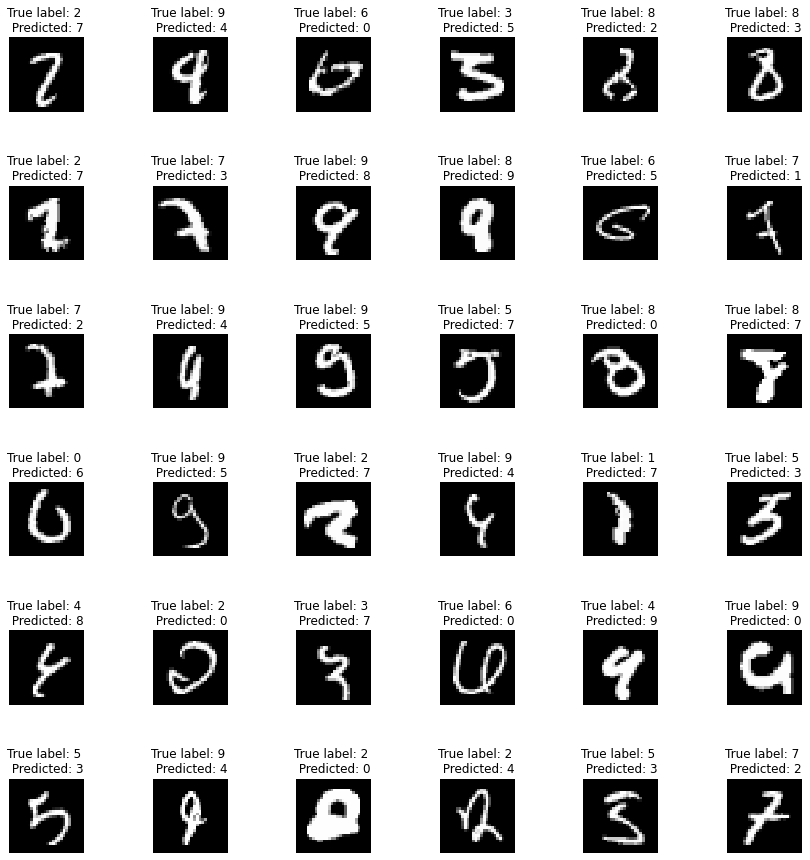

In [21]:
# Get the predicted labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels for the test set
y_true = np.argmax(Y_test, axis=1)

# Find the indices of the misclassified images
misclassified_indices = np.where(y_pred_classes != y_true)[0]
print(len(misclassified_indices))

# Display the misclassified images with their true and predicted labels
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=1)
for i, index in enumerate(misclassified_indices[:36]):
  plt.subplot(6, 6, i+1)
  plt.imshow(X_test[index].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("True label: {} \n Predicted: {}".format(y_true[index], y_pred_classes[index]))
  plt.axis('off')
plt.show()

# New Section

In [22]:
model.save("handwritten.h5")

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf

In [17]:
model = tf.keras.models.load_model("handwritten.h5")

In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0288 - accuracy: 0.9901
0.028844064101576805
0.9901000261306763


In [ ]:
#while os.path.isfile("img/5.png"):
try:
  img = cv2.imread("img/7.png")[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print("prediction is: ", np.argmax(prediction))
  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()
except:
  print("error")


error


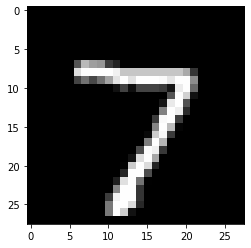

In [ ]:
plt.imshow(X_test[0], "gray")
plt.show()

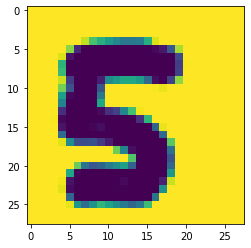

In [ ]:
img = cv2.imread("img/5.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()